# CODE CITED FROM STEVE BRUNTON'S PLAYLIST -- Fourier Analysis
##### [PLAYLIST](https://www.youtube.com/playlist?list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC)
##### [VIDEO](https://youtu.be/s2K1JfNR7Sc?list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC)

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size':18})

In [91]:
#creating a simple sum of sine wave signals with two frequencies

dt = 0.001 #timestamp -> 0.001 samples per second
t = np.arange(0,1,dt) #dataset that goes from time 0 to time 1 with step of dt
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) #sum of two sine waves of frequencies 50Hz and 120Hz
f_clean = f
#Creating random floats sampled from a 
#univariate “normal” (Gaussian) distribution 
#of mean 0 and variance 1.
f = f + 2.5 * np.random.randn(len(t)) #GAUSSIAN WHITE NOISE

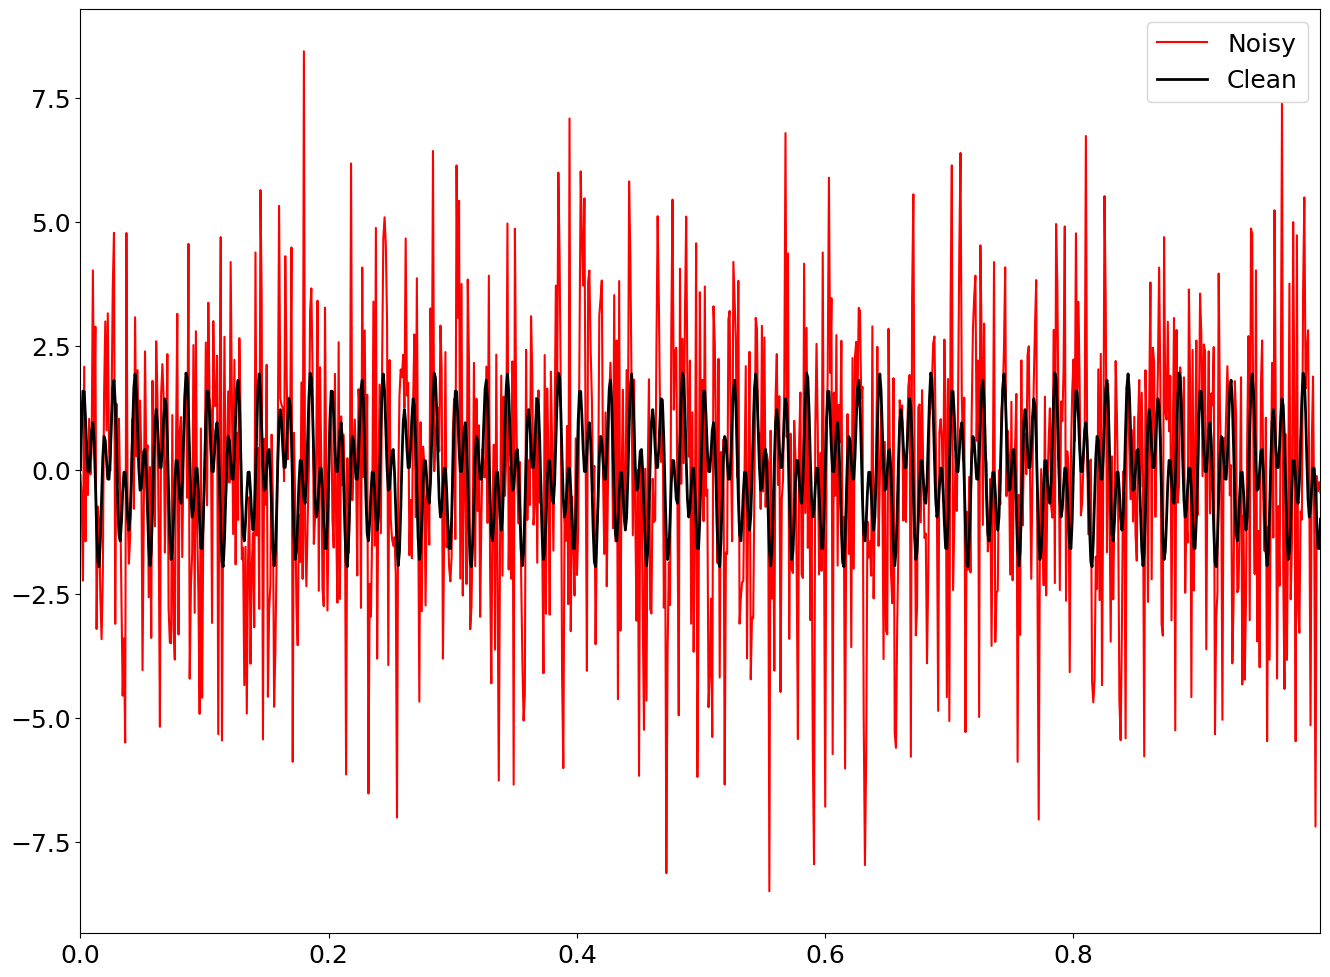

In [85]:
#visualising the clean data with the noisy data

plt.plot(t,f,color='r',linewidth=1.5,label = 'Noisy')
plt.plot(t,f_clean,color = 'k',linewidth=2, label = 'Clean')
plt.xlim(t[0],t[-1])
plt.legend()

In [92]:
#compute the fast fourier transform

n = len(t)
fhat = np.fft.fft(f,n) #parameters : data -> f and length of data -> n and it returns fhat values for data
#fhat values are complex numbers
# real part gives magnitude of the signal
#imaginary part gives the phase of the sine/cosine signal

#computing Power Spectral Density (power/frequency)
PSD = fhat * np.conj(fhat)/n
freq = (1/(dt*n)) * np.arange(n) #creating frequencies for all timestamp values (f = 1/T)
L = np.arange(1,np.floor(n/2),dtype='int') #only plot for first half 

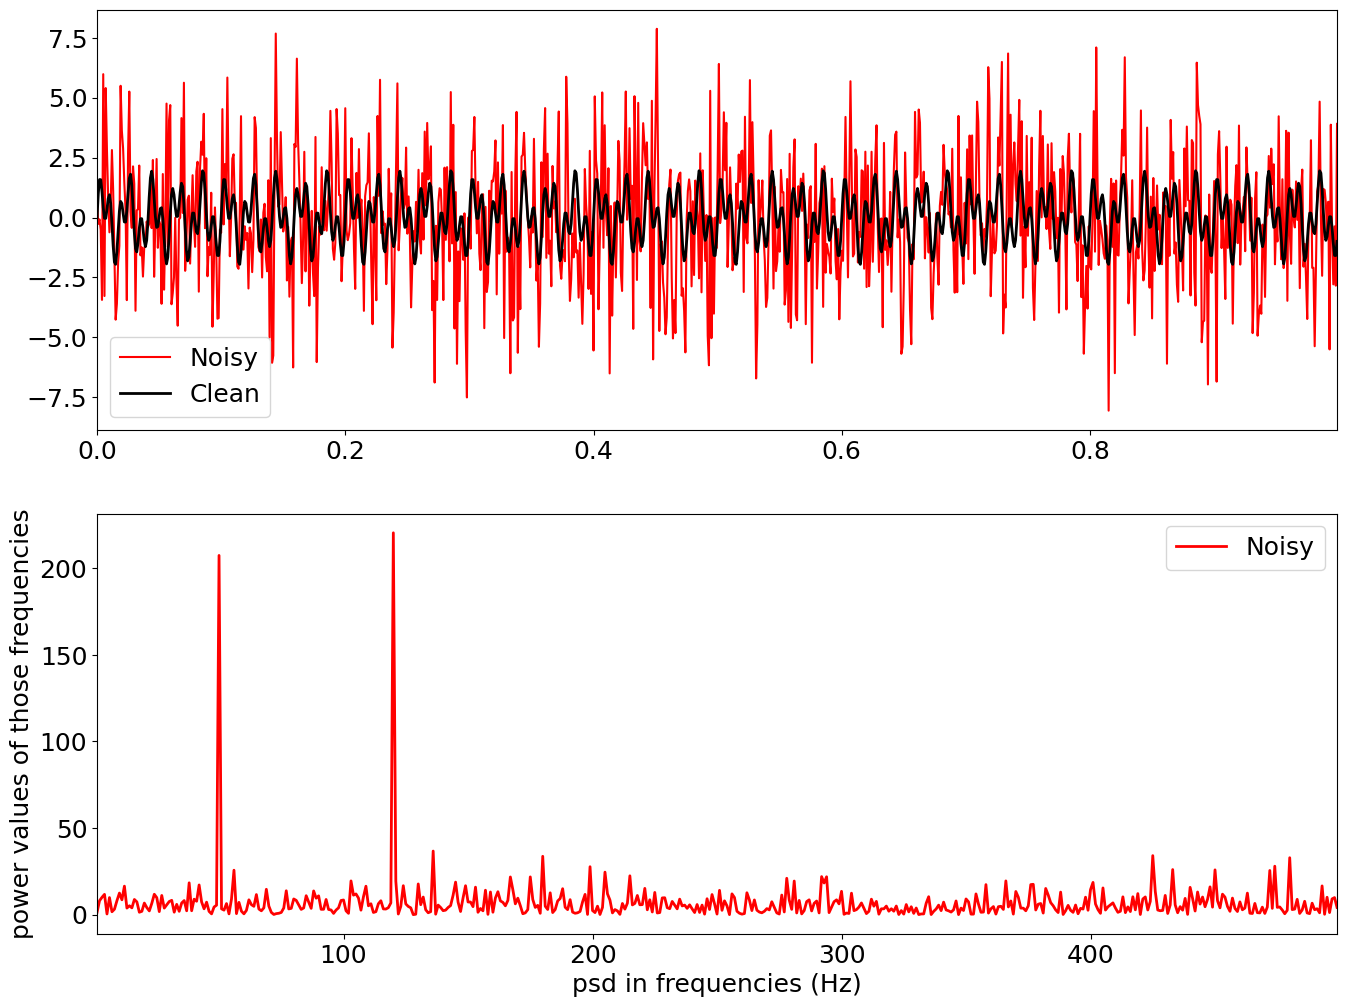

In [94]:
fig , axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label = 'Noisy')
plt.plot(t,f_clean,color = 'k',linewidth=2, label = 'Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color = 'r',linewidth=2, label = 'Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel('psd in frequencies (Hz)')
plt.ylabel('power values of those frequencies')
plt.legend()

plt.show()

In [108]:
#pruning values with a power value or magnitude less than 100

indices = PSD > 100 #finding frequencies with large power
PSDclean = PSD * indices #zero out all other frequencies
fhat = indices * fhat #zero out small fourier coeffs. in y 
ffilt = np.fft.ifft(fhat) #inverse FFT for filtered time signals

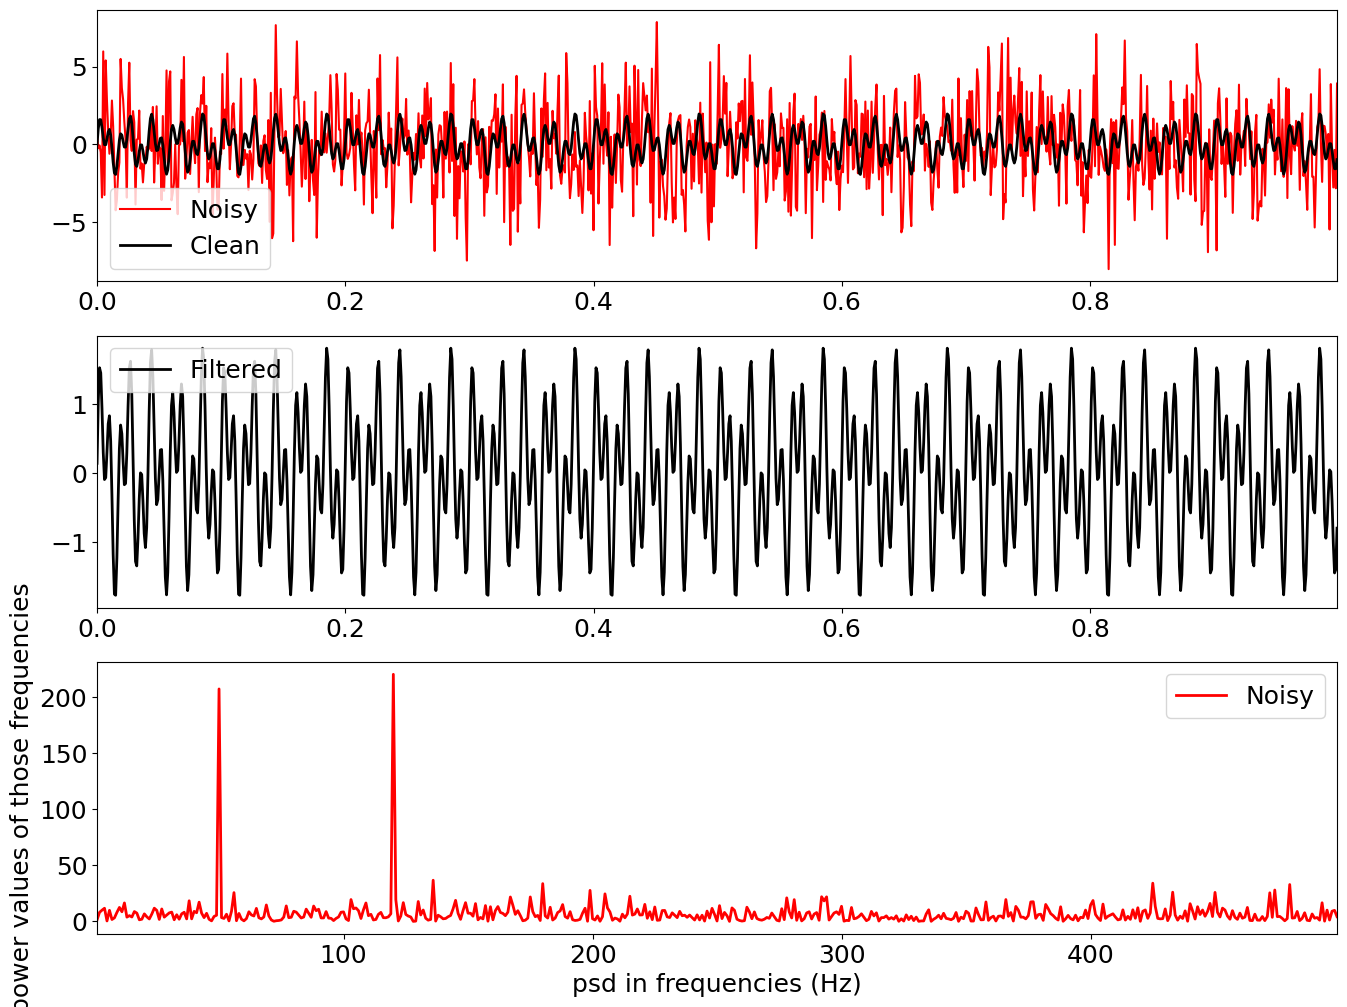

In [109]:
fig , axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label = 'Noisy')
plt.plot(t,f_clean,color = 'k',linewidth=2, label = 'Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color = 'k',linewidth=2, label = 'Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color = 'r',linewidth=2, label = 'Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel('psd in frequencies (Hz)')
plt.ylabel('power values of those frequencies')
plt.legend()

plt.show()